# CW Intern

## Task 1: House Price Prediction :       
**Objective:** Develop a machine learning model for predicting house prices using Python  
**Dataset:-** 

## Loading necessay Libraries and Dataset

In [242]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.nn as nn
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

In [273]:
data = pd.read_csv('/Users/asaifali/Downloads/HousePricePrediction.csv', encoding='latin1')
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


## Data Preprocessing

In [274]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [275]:
data.dropna(subset=["MSZoning"], inplace=True)
data.dropna(subset=["Exterior1st"], inplace=True)
data.dropna(subset=["BsmtFinSF2"], inplace=True)
data.dropna(subset=["TotalBsmtSF"], inplace=True)
data.dropna(subset=["SalePrice"], inplace=True)

In [276]:
data=data.drop(columns=['Id'])
# %%


In [277]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [278]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotArea       1460 non-null   int64  
 3   LotConfig     1460 non-null   object 
 4   BldgType      1460 non-null   object 
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Exterior1st   1460 non-null   object 
 9   BsmtFinSF2    1460 non-null   float64
 10  TotalBsmtSF   1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 148.3+ KB


In [280]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical column
data['MSZoning'] = le.fit_transform(data['MSZoning'])
data['LotConfig'] = le.fit_transform(data['LotConfig'])
data['BldgType'] = le.fit_transform(data['BldgType'])
data['Exterior1st'] = le.fit_transform(data['Exterior1st'])
print(data.head())

   MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  YearBuilt  \
0          60         3     8450          4         0            5       2003   
1          20         3     9600          2         0            8       1976   
2          60         3    11250          4         0            5       2001   
3          70         3     9550          0         0            5       1915   
4          60         3    14260          2         0            5       2000   

   YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0          2003           12         0.0        856.0   208500.0  
1          1976            8         0.0       1262.0   181500.0  
2          2002           12         0.0        920.0   223500.0  
3          1970           13         0.0        756.0   140000.0  
4          2000           12         0.0       1145.0   250000.0  


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   int64  
 2   LotArea       1460 non-null   int64  
 3   LotConfig     1460 non-null   int64  
 4   BldgType      1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Exterior1st   1460 non-null   int64  
 9   BsmtFinSF2    1460 non-null   float64
 10  TotalBsmtSF   1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 148.3 KB


In [282]:
y = data['SalePrice']  # Target variable

In [283]:
y.shape

(1460,)

In [284]:
X = data.drop(['SalePrice'],axis=1)  # Features

In [285]:
X.shape

(1460, 11)

In [286]:
# Check for missing values
print("Missing values in X:", np.isnan(X).any())
print("Missing values in y:", np.isnan(y).any())

# Check data types
print("Data type of X:", type(X))
print("Data type of y:", type(y))


Missing values in X: MSSubClass      False
MSZoning        False
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st     False
BsmtFinSF2      False
TotalBsmtSF     False
dtype: bool
Missing values in y: False
Data type of X: <class 'pandas.core.frame.DataFrame'>
Data type of y: <class 'pandas.core.series.Series'>


In [287]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

In [288]:
# Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Data Visualisation

<Figure size 1200x600 with 0 Axes>

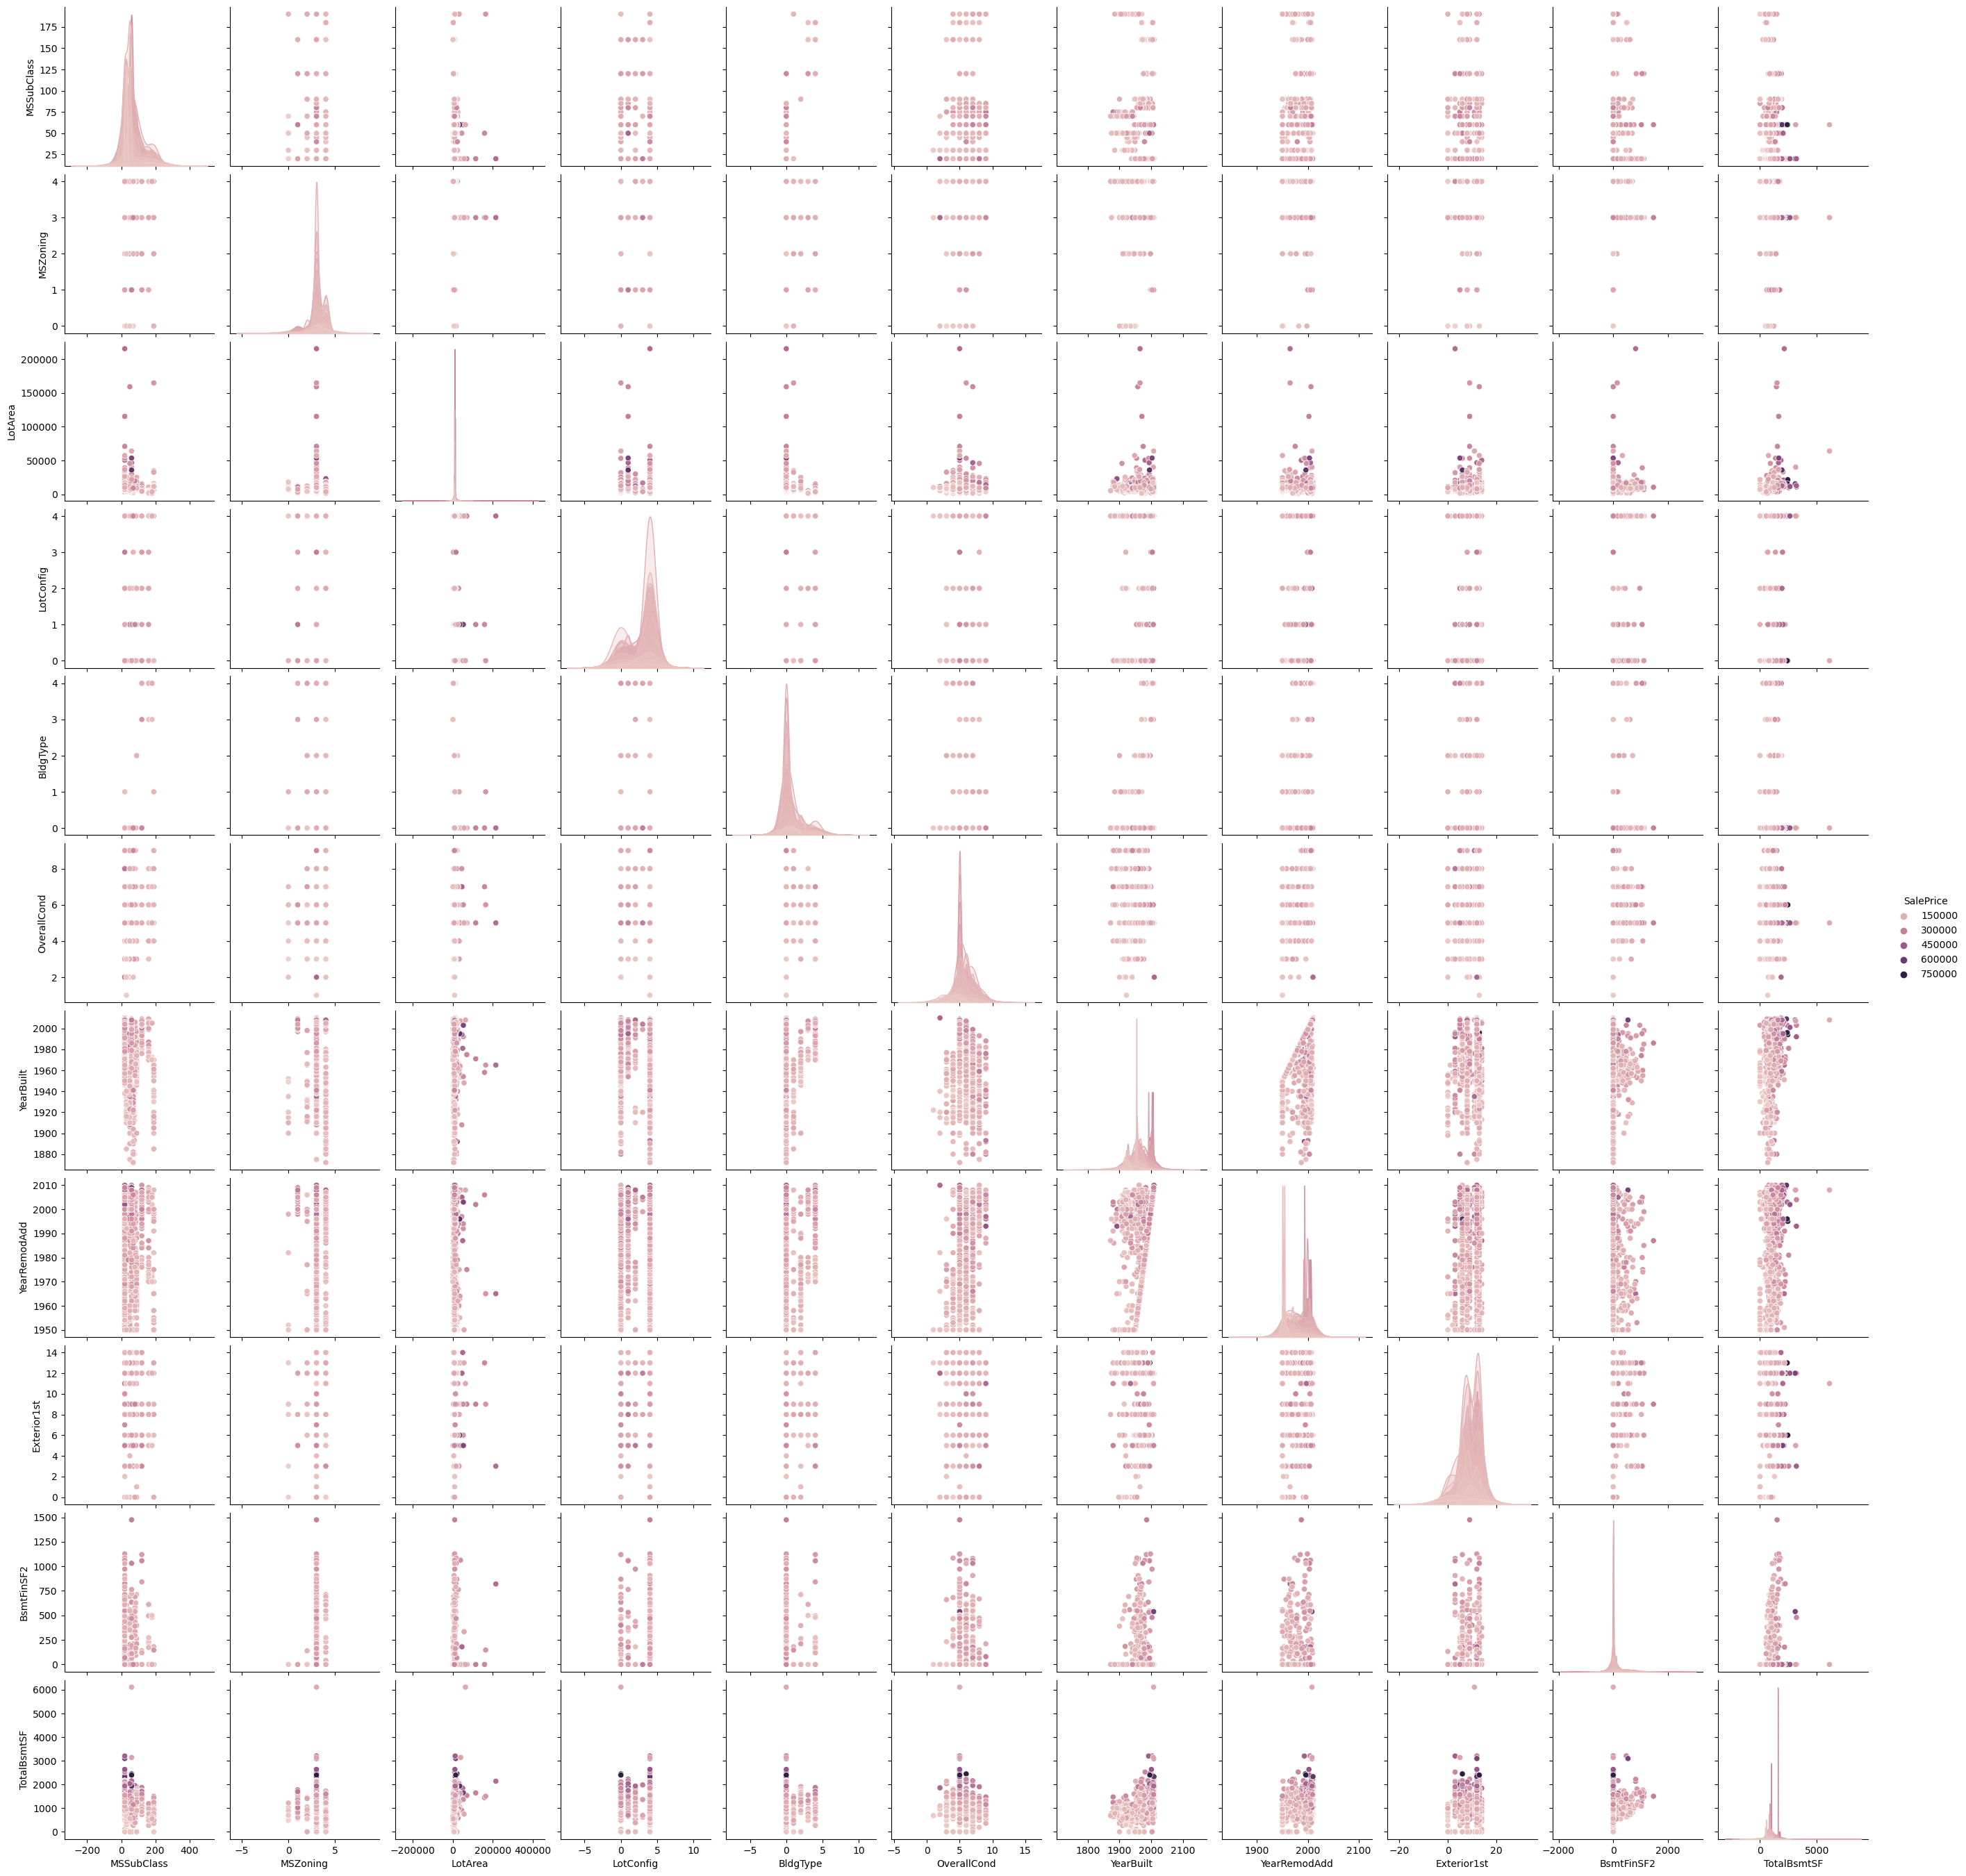

In [76]:
plt.figure(figsize=(12, 6))
sns.pairplot(data, kind='scatter',hue='SalePrice', diag_kind='kde')
plt.show()

<Axes: >

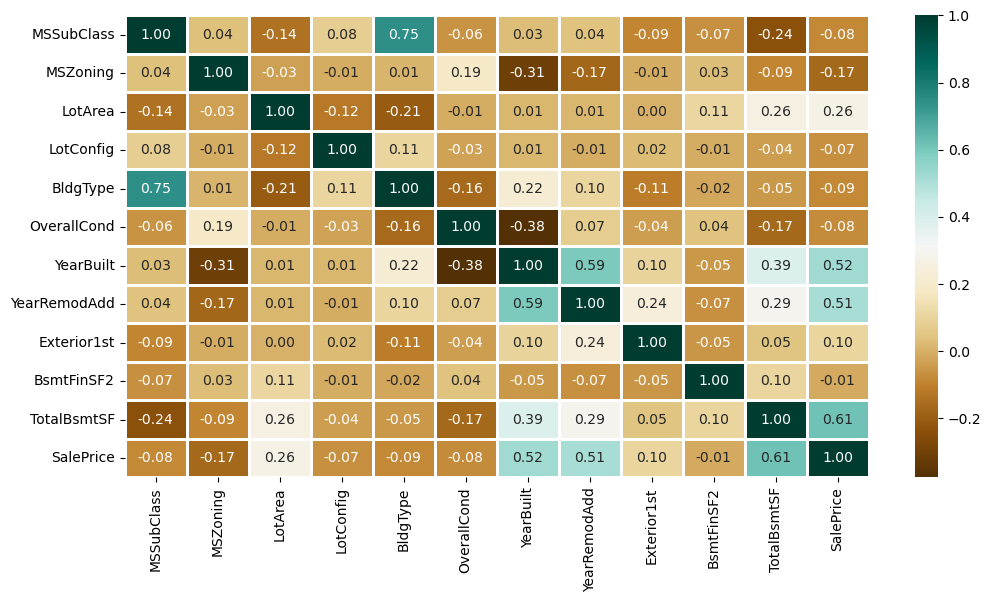

In [77]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


### **feature importance graph:** A feature importance graph displays the relative significance of different features in predicting the target variable. It aids in identifying the most influential features for the model's predictions, facilitating effective feature selection and enhancing understanding of the underlying data patterns.

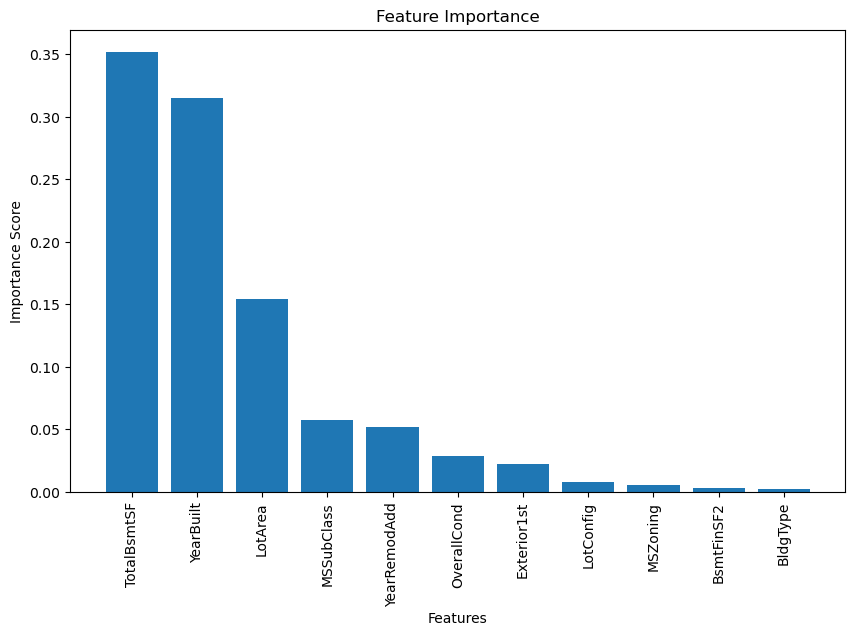

In [78]:
# Load the features   
feature_names = data.columns

# Train a RandomForestRegressor 
model = RandomForestRegressor()
model.fit(X_scaled, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


## Comparision of Models:

### **Decision Tree Regression:** Constructs a decision tree to model the data and predict outcomes based on a sequence of binary decisions.

In [105]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor()
# Fit the regressor on the training data
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [110]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )


0.16727257281406283
R2 Score= 0.7600789498996112


### **Random Forest Regression:** Averages predictions from multiple decision trees to enhance accuracy and decrease overfitting.

In [108]:
# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # or RandomForestClassifier

# Fit the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [109]:
# Make predictions on the test data
predictions = model.predict(X_test)


mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.16727257281406283
R2 Score= 0.7600789498996112


### **Support Vector Regression (SVR):** Utilizes support vector machines to perform regression tasks, enabling the handling of complex decision boundaries and non-linear data.

In [111]:
# Initialize the Support Vector Regressor
regressor = SVR(kernel='linear')

# Fit the regressor on the training data
regressor.fit(X_train, y_train)


SVR(kernel='linear')

In [112]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.3530106371325293
R2 Score= 0.0003486786416453391


### **Linear Regression:** A fundamental model that assumes a linear relationship between the input features and the target variable.

In [113]:
# Create a linear regression model and fit it on the training data
model = LinearRegression()

# Fit the regressor on the training data
model.fit(X_train, y_train)


LinearRegression()

In [114]:
# Make predictions on the test set
y_pred = model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.20726758061430473
R2 Score= 0.612221657849721


### **CatBoost Regressor:** An implementation of gradient boosting that is optimized for categorical features and provides high accuracy and fast training.

In [115]:
# Create a Catboost regression model and fit it on the training data
model = CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE')

# Fit the regressor on the training data
model.fit(X_train, y_train, verbose=False)

In [116]:
# Make predictions on the test data
y_pred = model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.14863539813728702
R2 Score= 0.8042016342839937


### **AdaBoost Regressor:** A boosting algorithm that combines multiple weak learners to create a strong predictive model, giving more weight to misclassified data points.

In [117]:
# Create a Adaboost regression model and fit it on the training data
model = AdaBoostRegressor(n_estimators=100, random_state=42)
# Fit the regressor on the training data
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [118]:
# Make predictions on the test data
y_pred = model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.2623626680560299
R2 Score= 0.6717229419028681


### **XGBoost Regressor:** An optimized gradient boosting library that is highly efficient and scalable, providing high prediction accuracy and handling complex datasets effectively.

In [119]:
# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the XGBoost regressor
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# Train the XGBoost regressor
model = xgb.train(params, dtrain, num_boost_round=100)

In [120]:
# Make predictions on the test data
y_pred = model.predict(dtest)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.1445776302086982
R2 Score= 0.8359600840299948


### **Ridge Regression:** A regression technique that incorporates L2 regularization to prevent overfitting by penalizing large coefficient values.

In [121]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model on the training data
ridge_model.fit(X_train, y_train)


Ridge()

In [122]:
# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.207299531805949
R2 Score= 0.6120815362731267


### **Lasso Regression:** Similar to Ridge Regression, it utilizes L1 regularization, encouraging sparsity in the coefficient values and performing feature selection.

In [123]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

Lasso()

In [124]:
# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.20726847614120814
R2 Score= 0.6122140762900171


### **Gradient Boosting Regression:** Builds an ensemble of weak learners, typically decision trees, in a sequential manner to create a powerful predictive model.

In [125]:
# Initialize the Gradient Boosting Regression model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [126]:
# Make predictions on the test data
y_pred = gbr_model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.1393267895186153
R2 Score= 0.8327873285373815


### **Polynomial Regression:** Extends linear regression by incorporating polynomial terms, allowing for the capture of non-linear relationships between variables.

In [127]:
# Transform the data to include another axis
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

In [130]:
# Make predictions
y_pred = poly_model.predict(X_poly)

mean_absolute_percentage_error(y, y_pred)
print(mean_absolute_percentage_error(y, y_pred))

R2 = r2_score(y, y_pred)
print("R2 Score=",R2 )

0.11035433998271199
R2 Score= 0.8845076917297103


### **Elastic Net Regression:** A hybrid of Ridge and Lasso Regression, combining L1 and L2 regularization to balance their properties.

In [131]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters as needed

# Fit the model on the training data
elastic_net_model.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [132]:
# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

mean_absolute_percentage_error(y_test, y_pred)
print(mean_absolute_percentage_error(y_test, y_pred))

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

0.2220697124838499
R2 Score= 0.5637240685603938


### **Conclusion:-** We can see that Polynomial Regression model is the best model and Support Vector Regression is the worst model.